In [80]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn import svm

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [81]:
bin_df = pd.read_pickle('./bin_df.pkl')

In [82]:
X = bin_df['string_tokens']
y = bin_df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, stratify = y)

In [120]:
vectorizer = TfidfVectorizer(ngram_range=(1,3))

X_train_vect = vectorizer.fit_transform(X_train)

X_test_vect = vectorizer.transform(X_test)

In [121]:
k_neighbors = KNeighborsClassifier()

k_neighbors.fit(X_train_vect, y_train)

KNeighborsClassifier()

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


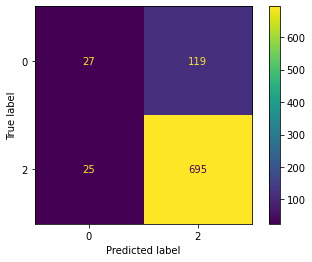

In [122]:
plot_confusion_matrix(k_neighbors, X_test_vect, y_test)

In [123]:
rfc = RandomForestClassifier()

rfc.fit(X_train_vect, y_train)

RandomForestClassifier()

In [124]:
y_preds = rfc.predict(X_test_vect)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


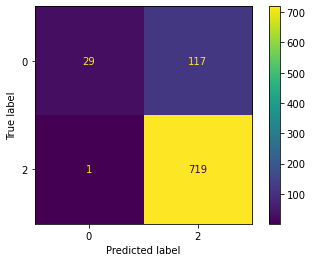

In [125]:
plot_confusion_matrix(rfc, X_test_vect, y_test)

In [126]:
svcl = svm.SVC()
svcl.fit(X_train_vect, y_train)
svcl_score = svcl.score(X_test_vect, y_test)
print("Results for Support Vector Machine with TFIDF-Vectorizer")
print(svcl_score)
y_pred_sv = svcl.predict(X_test_vect)

Results for Support Vector Machine with TFIDF-Vectorizer
0.8614318706697459


/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


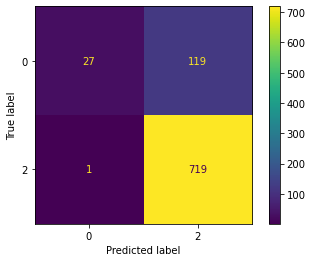

In [127]:
plot_confusion_matrix(svcl, X_test_vect, y_test)

In [128]:
print(classification_report(y_pred_sv, y_test))

              precision    recall  f1-score   support

           0       0.18      0.96      0.31        28
           2       1.00      0.86      0.92       838

    accuracy                           0.86       866
   macro avg       0.59      0.91      0.62       866
weighted avg       0.97      0.86      0.90       866



In [129]:
cnb = ComplementNB()

cnb.fit(X_train_vect, y_train)

y_preds_mnb = cnb.predict(X_test_vect)

In [130]:
print(classification_report(cnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.21      0.89      0.34        35
           2       0.99      0.86      0.92       831

    accuracy                           0.86       866
   macro avg       0.60      0.87      0.63       866
weighted avg       0.96      0.86      0.90       866



/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


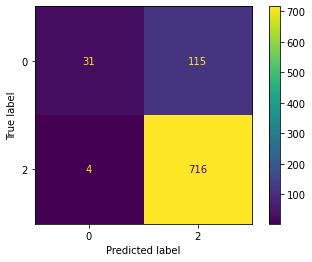

In [131]:
plot_confusion_matrix(cnb, X_test_vect, y_test)

In [132]:
gboost = GradientBoostingClassifier()

gboost.fit(X_train_vect, y_train)

y_preds_gboost = gboost.predict(X_test_vect)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


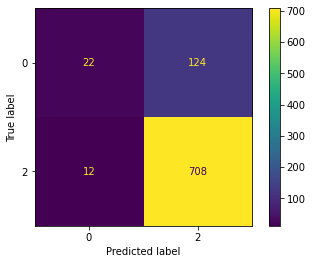

In [133]:
plot_confusion_matrix(gboost, X_test_vect, y_test)

In [134]:
oversample = SMOTE()
X_train_vect_smote, y_smote = oversample.fit_resample(X_train_vect, y_train)

In [135]:
cnb = ComplementNB()

cnb.fit(X_train_vect_smote, y_smote)

y_preds_cnb = cnb.predict(X_test_vect)

/Users/markhurtado/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


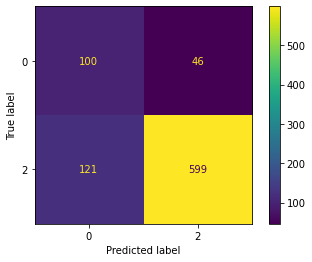

In [136]:
plot_confusion_matrix(cnb, X_test_vect, y_test)

In [137]:
print(classification_report(cnb.predict(X_test_vect), y_test))

              precision    recall  f1-score   support

           0       0.68      0.45      0.54       221
           2       0.83      0.93      0.88       645

    accuracy                           0.81       866
   macro avg       0.76      0.69      0.71       866
weighted avg       0.79      0.81      0.79       866

